In [1]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
happiness = pd.read_csv('/content/Happiness_report.csv')
metadata = pd.read_csv('/content/Metadata.csv')

In [2]:
# Filtrar información de México y establecer índice
mexico = happiness[happiness['Country or region'] == 'Mexico'].set_index('Country or region')
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


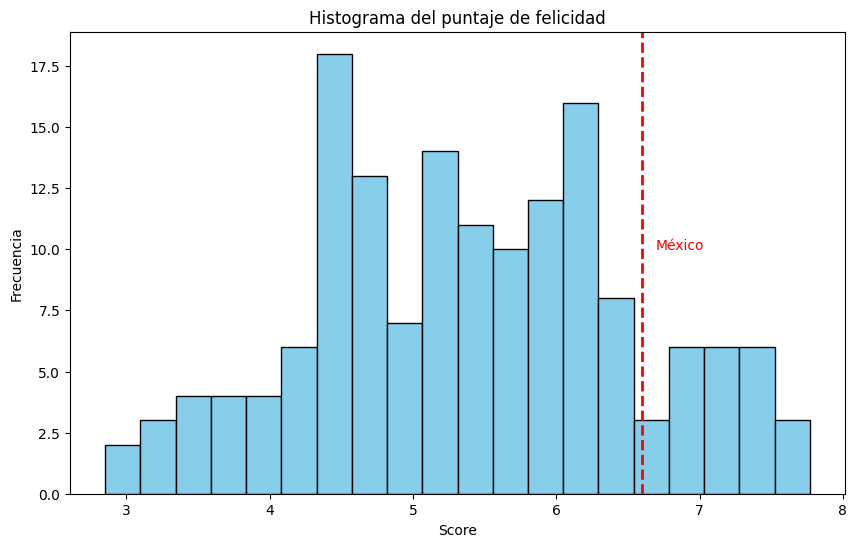

In [3]:
# Crear histograma del puntaje
plt.figure(figsize=(10, 6))
plt.hist(happiness['Score'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(mexico['Score'].values[0], color='red', linestyle='dashed', linewidth=2)
plt.text(mexico['Score'].values[0] + 0.1, 10, 'México', color='red')
plt.title('Histograma del puntaje de felicidad')
plt.xlabel('Score')
plt.ylabel('Frecuencia')
plt.show()

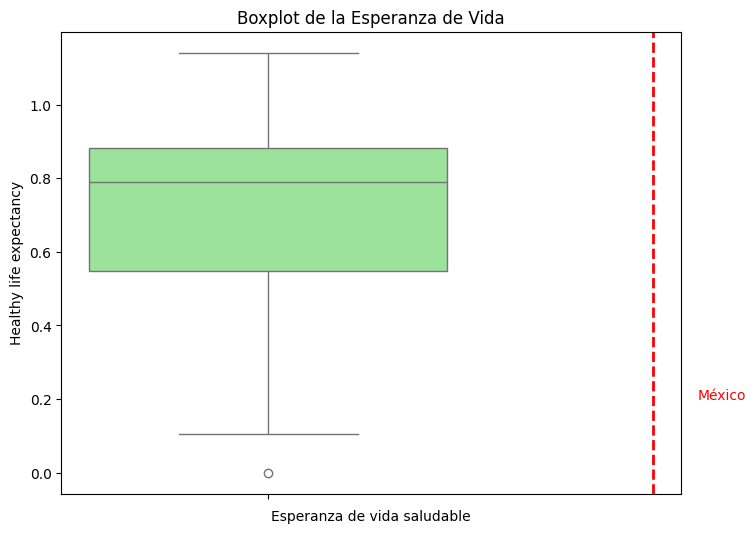

In [4]:
# Crear boxplot para la esperanza de vida
plt.figure(figsize=(8, 6))
sns.boxplot(happiness['Healthy life expectancy'], color='lightgreen')
plt.axvline(mexico['Healthy life expectancy'].values[0], color='red', linestyle='dashed', linewidth=2)
plt.text(mexico['Healthy life expectancy'].values[0] + 0.1, 0.2, 'México', color='red')
plt.title('Boxplot de la Esperanza de Vida')
plt.xlabel('Esperanza de vida saludable')
plt.show()

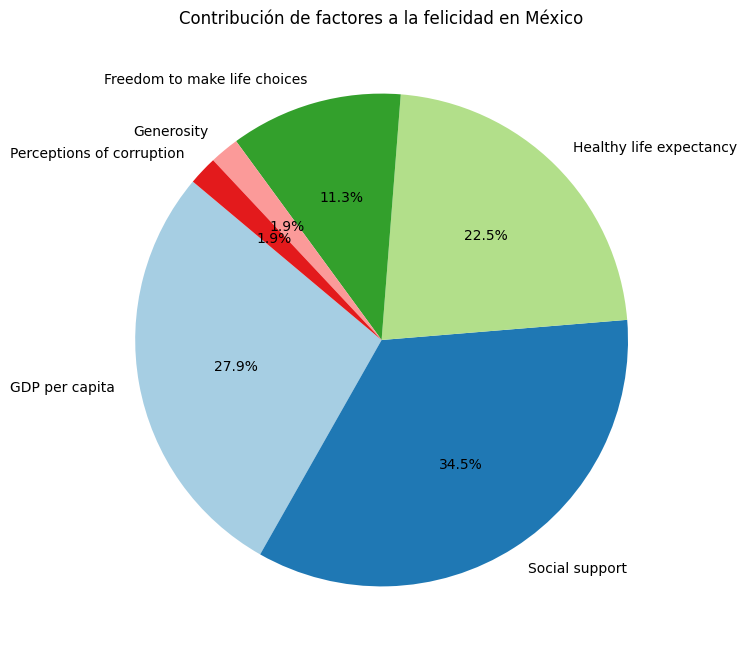

In [5]:
# Crear gráfica circular para México
factores = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
valores = mexico[factores].values[0]
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=factores, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Contribución de factores a la felicidad en México')
plt.show()

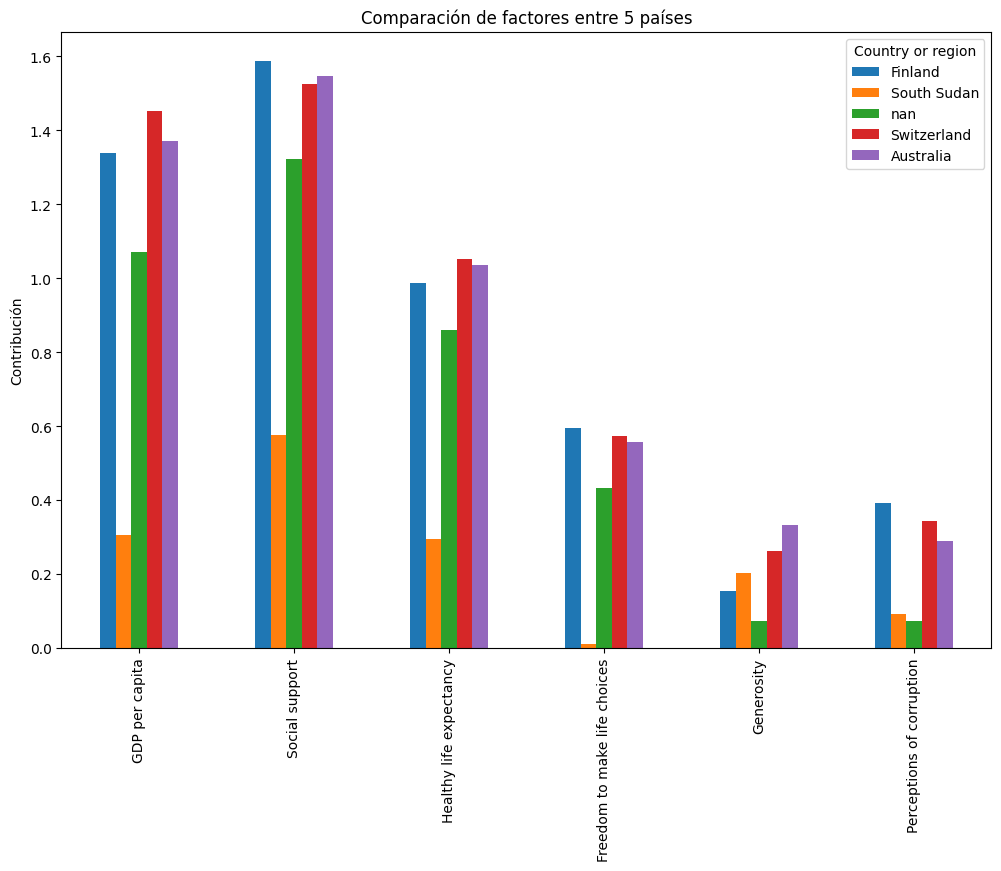

In [7]:
import pandas as pd # Import pandas

# Filtrar los 5 países (más feliz, menos feliz, México y 2 más)
paises = pd.concat([happiness.iloc[[0, -1]], mexico, happiness.iloc[[5, 10]]]) # Use pd.concat to combine
paises.set_index('Country or region', inplace=True)

# Gráfica de barras
paises[factores].T.plot(kind='bar', figsize=(12, 8))
plt.title('Comparación de factores entre 5 países')
plt.ylabel('Contribución')
plt.show()

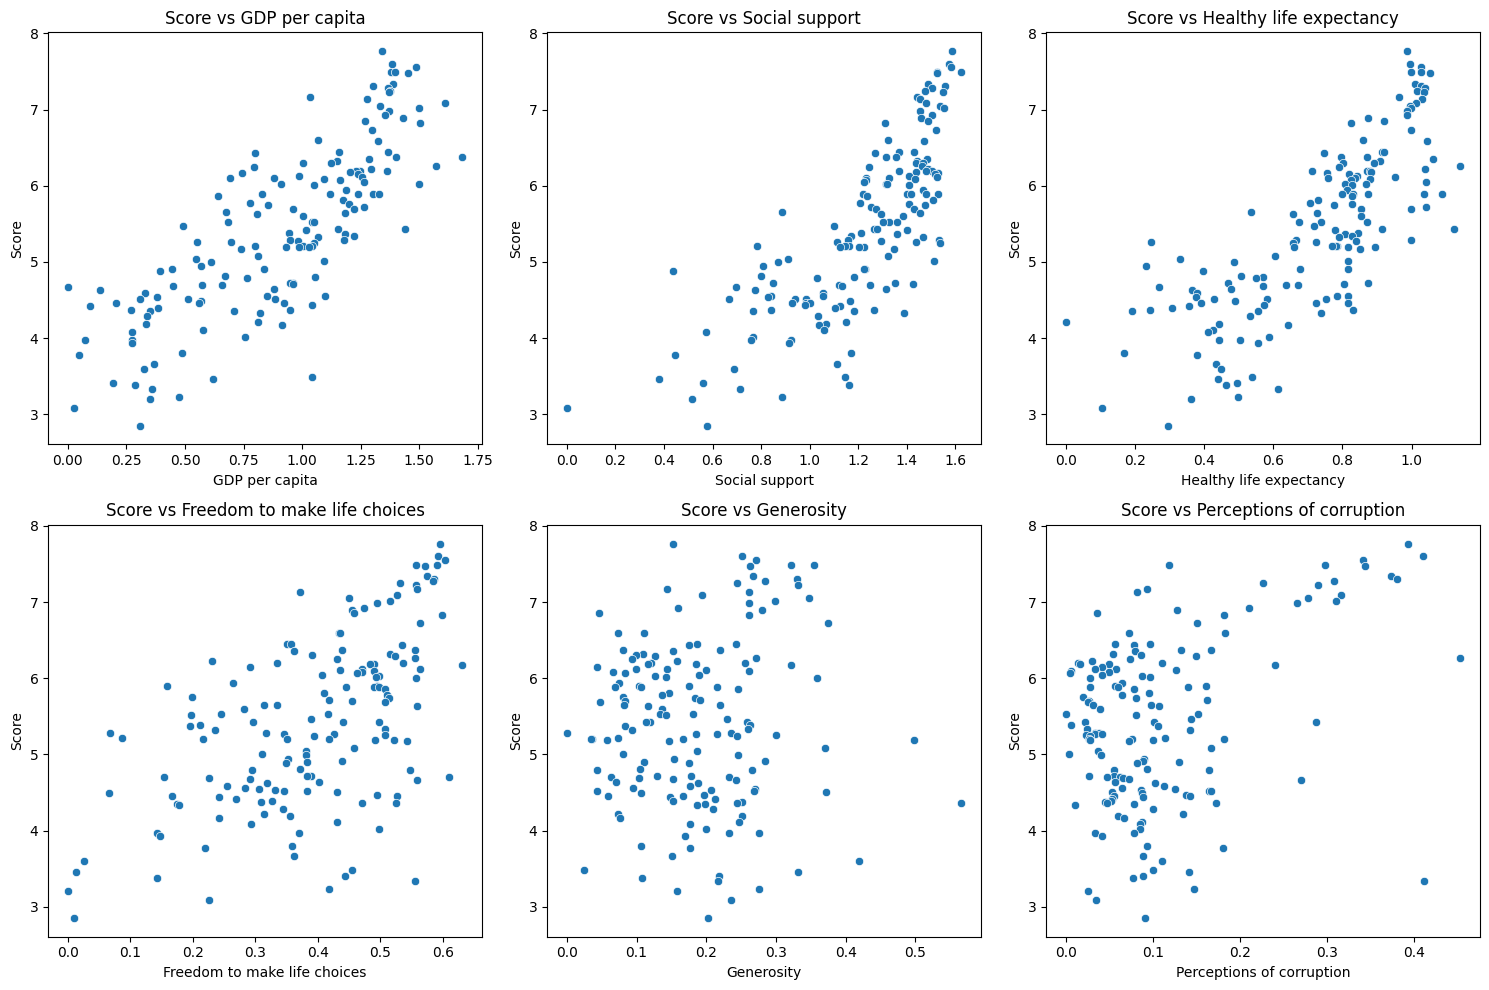

In [8]:
# Crear matriz de scatter plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, factor in enumerate(factores):
    row, col = divmod(i, 3)
    sns.scatterplot(x=happiness[factor], y=happiness['Score'], ax=axes[row, col])
    axes[row, col].set_title(f'Score vs {factor}')
plt.tight_layout()
plt.show()

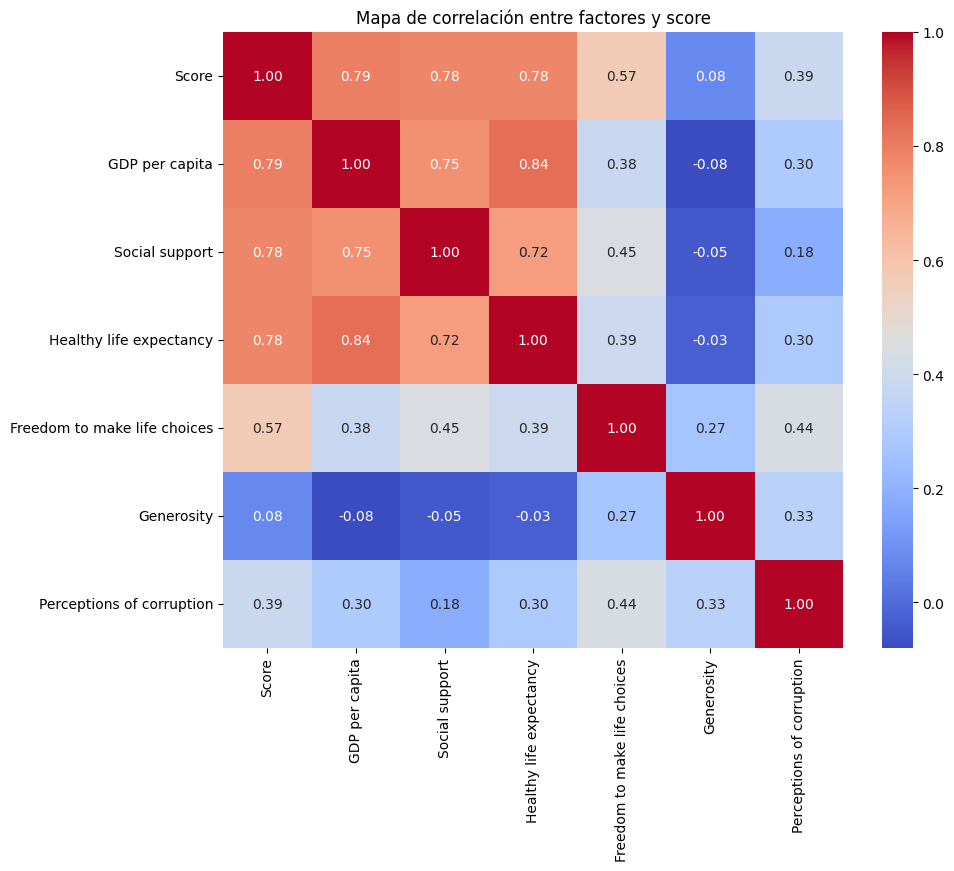

In [9]:
# Crear heatmap de correlación
corr = happiness[['Score'] + factores].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Mapa de correlación entre factores y score')
plt.show()

In [50]:
happiness.rename(columns={'Country or region': 'Country'}, inplace=True)
metadata.rename(columns={'<NOMBRE_EN_METADATA>': 'Country'}, inplace=True)  # Reemplaza <NOMBRE_EN_METADATA> con el nombre real

In [55]:
# Revisar nombres de columnas en ambos DataFrames
print("Columnas en happiness:")
print(happiness.columns)

print("\nColumnas en metadata:")
print(metadata.columns)

Columnas en happiness:
Index(['overall rank', 'country', 'score', 'gdp per capita', 'social support',
       'healthy life expectancy', 'freedom to make life choices', 'generosity',
       'perceptions of corruption'],
      dtype='object')

Columnas en metadata:
Index(['country code', 'region', 'incomegroup', 'specialnotes', 'tablename'], dtype='object')


In [56]:
# Renombrar columna 'tablename' en metadata a 'country' para la fusión
metadata.rename(columns={'tablename': 'country'}, inplace=True)

In [57]:
# Combinar DataFrames en la columna 'country'
happiness_metadata = happiness.merge(metadata, on='country')

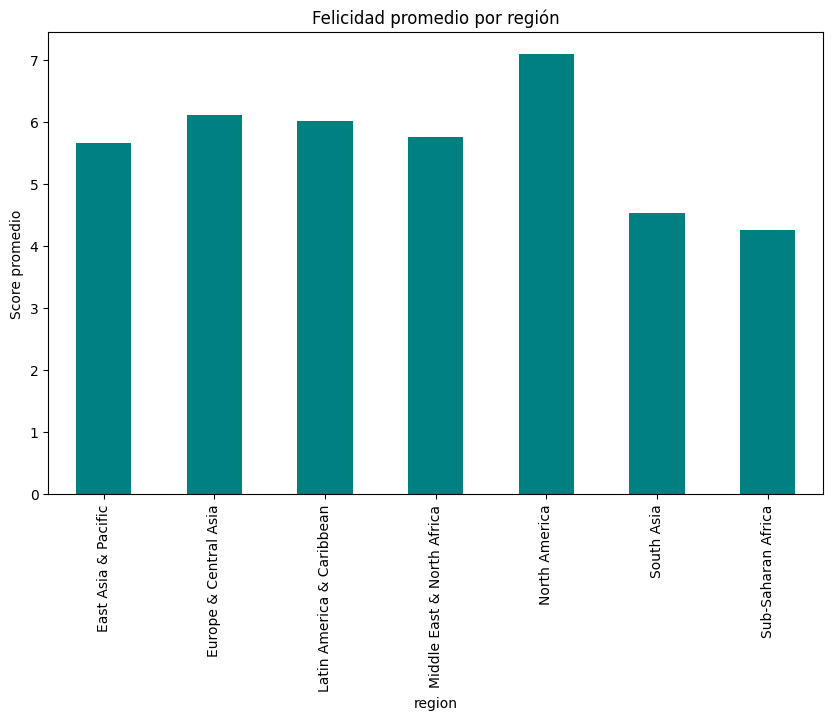

In [58]:
# Agrupar por región y calcular el promedio de felicidad
felicidad_por_region = happiness_metadata.groupby('region')['score'].mean()

# Graficar felicidad promedio por región
felicidad_por_region.plot(kind='bar', figsize=(10, 6), color='teal')
plt.title('Felicidad promedio por región')
plt.ylabel('Score promedio')
plt.show()